In [3]:
import tensorflow.compat.v1 as tf
import numpy as np
import pandas as pd

In [4]:
# 랜덤 시드 고정
tf.set_random_seed(777)
np.random.seed(777)

In [ ]:
w = tf.Variable(tf.random_normal([1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

In [ ]:
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])
hf = x*w + b
cost = tf.reduce_mean(tf.square(hf-y))

In [ ]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = opt.minimize(cost)

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for step in range(20000):
    _,cv,bv,wv = sess.run([train,cost,b,w], feed_dict={x:[1,2,3],y:[4,5,6]})
    if step % 100 == 0:
        print(step, cv, bv, wv)

## Linear Regression

In [8]:
w = tf.Variable([100.], tf.float32)
b = tf.Variable([-10.], tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
# 초기 가정 선형 모델
# hf = 100 * x - 10
hf = x*w + b
cost = tf.reduce_sum(tf.square(hf-y))
opt = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = opt.minimize(cost)

In [9]:
xtrain = [1,2,3,4,5]
ytrain=[0,-1,-2,-3,-4]

In [10]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
for i in range(1000):
    sess.run(train, {x:xtrain, y:ytrain})

In [12]:
wv,bv,cv = sess.run([w,b,cost], {x:xtrain, y:ytrain})
print(f'weight : {wv}, bias : {bv}, cost : {cv}')

weight : [7.4674172], bias : [-29.567663], cost : 850.37890625


## cost 변화 시각화

선형회귀모델 작성

시각화 >> weight값을 -3에서 5까지 0.1씩 증가

증가에 따른 cost값의 변화를 출력

In [180]:
x = [1,3,5]
y = [10, 28, 40]
w = tf.placeholder(tf.float32)
hf = x*w
loss = tf.reduce_mean(tf.square(hf-y))

In [181]:
import matplotlib.pyplot as plt

In [182]:
w_history, c_history = [], []

for i in range(-100, 301, 1):
    curr_w = i * 0.1
    loss_v = sess.run(loss, {w:curr_w})
    w_history.append(curr_w)
    c_history.append(loss_v)

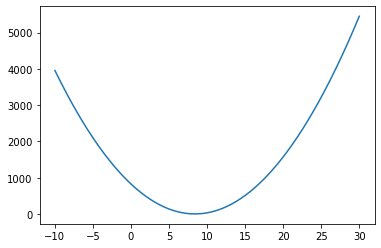

In [183]:
plt.plot(w_history, c_history)

## 경사하강법에서 update 구문 작성

In [173]:
xdata = [1,2,3]
ydata = [9,8,7]

In [174]:
w = tf.Variable(tf.random_normal([1]))
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
lr = 0.01

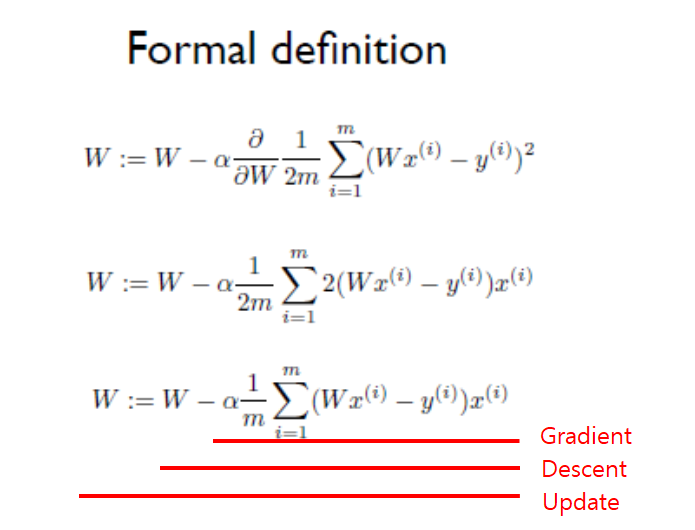

In [177]:
hf = x*w +b
cost = tf.reduce_mean(tf.square(hf-y))
gradient = tf.reduce_mean((w*x+b-y)*x)
descent = w-lr*gradient
update = w.assign(descent) 
# 텐서플로우에서는 assign 함수를 사용해야 값이 변경됨

In [178]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(201):
    feed_dict = {x:xdata, y:ydata}
    sess.run(update,feed_dict)
    cv,wv,bv = sess.run([cost,w,b],feed_dict)
    print(step,cv, wv, bv )

0 24.605421 [2.7208054] [-1.3628126]
1 24.043844 [2.774424] [-1.3628126]
2 23.533457 [2.8255405] [-1.3628126]
3 23.069597 [2.8742716] [-1.3628126]
4 22.648024 [2.9207284] [-1.3628126]
5 22.264872 [2.9650173] [-1.3628126]
6 21.91665 [3.0072393] [-1.3628126]
7 21.600172 [3.047491] [-1.3628126]
8 21.312544 [3.0858643] [-1.3628126]
9 21.05113 [3.1224468] [-1.3628126]
10 20.813547 [3.1573222] [-1.3628126]
11 20.597622 [3.19057] [-1.3628126]
12 20.40138 [3.2222664] [-1.3628126]
13 20.223024 [3.2524836] [-1.3628126]
14 20.060928 [3.2812905] [-1.3628126]
15 19.913609 [3.3087533] [-1.3628126]
16 19.779716 [3.3349345] [-1.3628126]
17 19.65803 [3.3598938] [-1.3628126]
18 19.547436 [3.3836884] [-1.3628126]
19 19.446922 [3.4063725] [-1.3628126]
20 19.355574 [3.427998] [-1.3628126]
21 19.272552 [3.4486144] [-1.3628126]
22 19.197096 [3.4682686] [-1.3628126]
23 19.128517 [3.4870057] [-1.3628126]
24 19.066193 [3.5048683] [-1.3628126]
25 19.009546 [3.5218973] [-1.3628126]
26 18.958065 [3.5381317] [-1.36

In [179]:
w = tf.placeholder(tf.float32)

w_history, c_history = [], []
for i in range(-100, 301, 1):
    curr_w = i * 0.1
    loss_v = sess.run(cost, {w:curr_w})
    w_history.append(curr_w)
    c_history.append(loss_v)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_33' with dtype float
	 [[node Placeholder_33 (defined at C:\Users\chan\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'Placeholder_33':
  File "C:\Users\chan\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\chan\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\chan\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\chan\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\chan\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\chan\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\chan\Anaconda3\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Users\chan\Anaconda3\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Users\chan\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\chan\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\chan\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\chan\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\chan\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\chan\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\chan\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\chan\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\chan\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\chan\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\chan\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\chan\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\chan\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\chan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\chan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Users\chan\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\chan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\chan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\chan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-174-3f14d2ec0b31>", line 3, in <module>
    y = tf.placeholder(tf.float32)
  File "C:\Users\chan\Anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\chan\Anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 6669, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\chan\Anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\chan\Anaconda3\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\chan\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\Users\chan\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\Users\chan\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


# Multi Variable Linear Regression

In [21]:
x1_data = [73,93,90,95,72] # 5명의 모의고사 점수
x2_data = [80,88,92,98,66]
x3_data = [75,92,90,100,70]
ydata = [152,185,180,195,140] # 최종 수능 점수

다변수로 바뀌면서 가정 함수는

hf = x1*w1 + x2*w2 + x3*w3 + b

이러한 형식으로 바껴야됨

In [22]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [23]:
w1 = tf.Variable(tf.random_normal([1]))
w2 = tf.Variable(tf.random_normal([1]))
w3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
hf = x1*w1 + x2*w2 + x3*w3 + b

In [24]:
cost = tf.reduce_mean(tf.square(hf-y))
opt = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = opt.minimize(cost)

In [25]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [26]:
for step in range(5001):
    cv, hfv, _ = sess.run([cost, hf, train],feed_dict={x1:x1_data, x2:x2_data, x3:x3_data, y:ydata})
    if step % 100 == 0:
        print(f'Step : {step}, Cost : {cv}, Prediction : {hfv}')

Step : 0, Cost : 78320.9140625, Prediction : [-101.249084 -111.02042  -116.11594  -125.18494   -82.7966  ]
Step : 100, Cost : 7.815374851226807, Prediction : [147.34982 186.4538  180.36343 194.2151  143.81982]
Step : 200, Cost : 7.4819841384887695, Prediction : [147.441   186.3843  180.38942 194.24196 143.73936]
Step : 300, Cost : 7.164990425109863, Prediction : [147.52986 186.31647 180.41473 194.26814 143.66089]
Step : 400, Cost : 6.863598823547363, Prediction : [147.61653 186.25037 180.43942 194.29367 143.58438]
Step : 500, Cost : 6.576966762542725, Prediction : [147.70108 186.18593 180.4635  194.3186  143.50978]
Step : 600, Cost : 6.304510116577148, Prediction : [147.78346 186.12306 180.48698 194.3429  143.43703]
Step : 700, Cost : 6.045393943786621, Prediction : [147.86382 186.06177 180.50984 194.3666  143.36607]
Step : 800, Cost : 5.7990522384643555, Prediction : [147.94217 186.00201 180.53217 194.38971 143.2969 ]
Step : 900, Cost : 5.5647993087768555, Prediction : [148.01857 185.

In [27]:
print(hfv, ydata) # 거의 유사해 지는 것을 확인할 수 있음

[149.9449  184.47295 181.10077 194.98477 141.52657] [152, 185, 180, 195, 140]


### Matrix 활용

hf = x1*w1 + x2*w2 + x3*w3 + b
다변수가 3개가 아닌 수십개 수백개면 직접 작성할 수 없습니다. 
따라서 matrix 구조를 활용해서 작성하는 것이 옳은 방법입니다.


In [28]:
# 2차원 행렬 방식을 사용해서 작성
xdata =[[73,93,90,95,72]
        ,[80,88,92,98,66]
        ,[75,92,90,100,70]]
ydata = [[152],[185],[180],[195],[140]]

다음과 같은 방식으로 데이터가 있을 경우 데이터의 구조가 맞지 않는다.
xdata는 3행 5열 : 각 열이 사람을 의미한다.
ydata는 5행 1열 : 각 열이 사람을 의미한다.
따라서 데이터 구조를 맞춰주기 위해서 xdata를 transpose해서 행과 열을 바꿔주어야합니다.

In [29]:
xdata = np.array(xdata).T
print(xdata) # 각 행이 한 학생의 점수를 나타낸다.
ydata

[[ 73  80  75]
 [ 93  88  92]
 [ 90  92  90]
 [ 95  98 100]
 [ 72  66  70]]


[[152], [185], [180], [195], [140]]

In [30]:
print(xdata.shape)
print(np.array(ydata).shape)

(5, 3)
(5, 1)


In [31]:
# hf = x * w + b
#    (5,3) * (3,1) + 1

In [32]:
x = tf.placeholder(tf.float32, shape=[None,3]) # 3개월의 데이터
y = tf.placeholder(tf.float32, shape=[None,1]) # 결과는 수능점수 1개
w = tf.Variable(tf.random_normal([3,1])) # w의 shape 주의
b = tf.Variable(tf.random_normal([1]))

In [33]:
hf = tf.matmul(x,w) + b # 이제 matrix를 사용하므로 행렬곱 matmul을 사용함

In [35]:
tf.__version__

'1.15.0'

In [36]:
cost = tf.reduce_mean(tf.square(hf-y))
opt = tf.train.GradientDescentOptimizer(1e-5)
train = opt.minimize(cost)

In [55]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
c_history = []
hf_history = []
for step in range(100):
    _, cv, hfv = sess.run([train, cost, hf], feed_dict={x:xdata, y:ydata})
    c_history.append(cv)
    hf_history.append(hfv)
    if step % 10 == 0:
        print(f'cost : {cv},\nhf : \n{hfv}')

cost : 84215.453125,
hf : 
[[-111.34212 ]
 [-121.37104 ]
 [-127.50024 ]
 [-137.10213 ]
 [ -90.253654]]
cost : 12.891827583312988,
hf : 
[[145.56331]
 [186.20898]
 [178.96254]
 [193.0541 ]
 [144.087  ]]
cost : 12.0477933883667,
hf : 
[[146.36116]
 [187.14116]
 [179.90361]
 [194.0677 ]
 [144.79369]]
cost : 11.992301940917969,
hf : 
[[146.37537]
 [187.13507]
 [179.90988]
 [194.07419]
 [144.78552]]
cost : 11.937162399291992,
hf : 
[[146.3871 ]
 [187.12614]
 [179.91325]
 [194.07759]
 [144.77518]]
cost : 11.882246017456055,
hf : 
[[146.3988 ]
 [187.11719]
 [179.9166 ]
 [194.08096]
 [144.76485]]
cost : 11.827634811401367,
hf : 
[[146.41052]
 [187.10834]
 [179.91997]
 [194.08435]
 [144.75458]]
cost : 11.773294448852539,
hf : 
[[146.42218]
 [187.09944]
 [179.92331]
 [194.08772]
 [144.74432]]
cost : 11.719207763671875,
hf : 
[[146.4338 ]
 [187.09059]
 [179.92664]
 [194.09106]
 [144.73407]]
cost : 11.665419578552246,
hf : 
[[146.4454 ]
 [187.08177]
 [179.92998]
 [194.09445]
 [144.72386]]


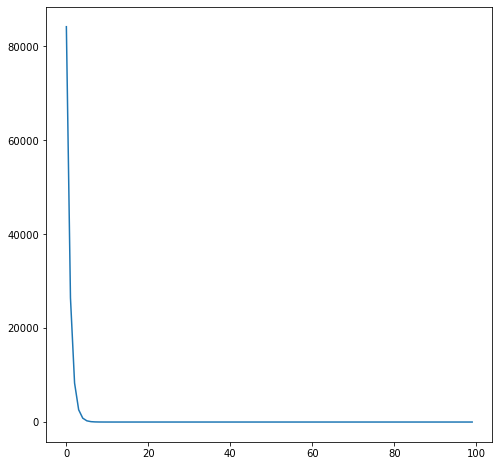

In [56]:
plt.figure(figsize=(8,8))
plt.plot(c_history)

# 실습

In [65]:
path = r"C:\Users\chan\Desktop\dataset"
df = pd.read_csv(path + "\data-01-test-score.csv", index_col=False, header=None)

모델을 만들고 90,90,90 점을 받았을 때, 예상되는 점수는 ?

In [68]:
df.head()

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [71]:
df.columns = ['3월','6월','9월','수능']
df.head()

,3월,6월,9월,수능
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [76]:
xdata = df.iloc[:,:-1]
xdata.head()

,3월,6월,9월
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70


In [79]:
np.array(xdata)

array([[ 73,  80,  75],
       [ 93,  88,  93],
       [ 89,  91,  90],
       [ 96,  98, 100],
       [ 73,  66,  70],
       [ 53,  46,  55],
       [ 69,  74,  77],
       [ 47,  56,  60],
       [ 87,  79,  90],
       [ 79,  70,  88],
       [ 69,  70,  73],
       [ 70,  65,  74],
       [ 93,  95,  91],
       [ 79,  80,  73],
       [ 70,  73,  78],
       [ 93,  89,  96],
       [ 78,  75,  68],
       [ 81,  90,  93],
       [ 88,  92,  86],
       [ 78,  83,  77],
       [ 82,  86,  90],
       [ 86,  82,  89],
       [ 78,  83,  85],
       [ 76,  83,  71],
       [ 96,  93,  95]], dtype=int64)

In [83]:
ydata = df.iloc[:,-1]
ydata.head()

0    152
1    185
2    180
3    196
4    142
Name: 수능, dtype: int64

In [84]:
ydata = np.array(ydata).reshape(-1,1)
ydata

array([[152],
       [185],
       [180],
       [196],
       [142],
       [101],
       [149],
       [115],
       [175],
       [164],
       [141],
       [141],
       [184],
       [152],
       [148],
       [192],
       [147],
       [183],
       [177],
       [159],
       [177],
       [175],
       [175],
       [149],
       [192]], dtype=int64)

In [135]:
x = tf.placeholder(tf.float32, shape = [None, 3])
y = tf.placeholder(tf.float32, shape = [None, 1])
w = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))

hf = tf.matmul(x,w) + b
cost = tf.reduce_mean(tf.square(y-hf))
opt = tf.train.GradientDescentOptimizer(1e-5)
train = opt.minimize(cost)

In [136]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
c_history = []
for step in range(20):
    _, cv, hfv = sess.run([train, cost, hf], feed_dict={x:xdata, y:ydata})
    c_history.append(cv)
    if step % 10 == 0:
        print(f'cost : {cv}')            
#             print(f'cost : {cv},\nhf : \n{hfv}')

cost : 426.2705383300781
cost : 16.674846649169922


In [137]:
x_test = np.array([90.,90.,90.]).reshape(1,3)
yhat = tf.matmul(sess.run(x,{x:x_test}),sess.run(w)) + sess.run(b)
print(sess.run(yhat))

[[182.32043]]


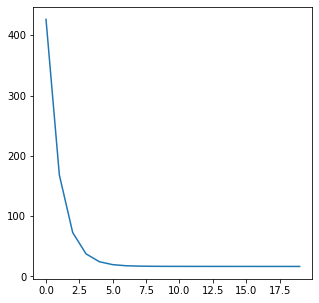

In [138]:
plt.figure(figsize=(5,5))
plt.plot(c_history)

In [140]:
x_test = [90,90,90]
sess.run(hf,{x:[x_test]})

array([[182.32043]], dtype=float32)

In [184]:
xdata=[[1,2],
      [2,3],
      [3,1],
      [4,3],
      [5,3],
      [6,2]] #학습시간, 출석일수

ydata=[[0],
      [0],
      [0],
      [1],
      [1],
      [1]]

In [185]:
x=tf.placeholder(tf.float32, shape=[None,2]) #xdata 6행2열
y=tf.placeholder(tf.float32, shape=[None,1]) #ydata 6행1열

In [187]:
w = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

In [188]:
hf = tf.sigmoid(tf.matmul(x,w)+b)

In [189]:
cost = -tf.reduce_mean(y*tf.log(hf) + (1-y)*tf.log(1-hf))

In [190]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [209]:
# 0.5 기준으로 크면 1 작으면 0
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [210]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _, cv = sess.run([train, cost], feed_dict={x:xdata, y:ydata})
        if step % 1000 == 0:
            print(f'cost : {cv}')
    pv, hfv, av = sess.run([predicted, hf, accuracy],feed_dict={x:xdata, y:ydata})
    print("예측값 : ", pv,'\n', "예측분류 : ", hfv, '\n', '정확도 : ', av)
    sess.close()

cost : 1.2179919481277466
cost : 0.466013640165329
cost : 0.38499149680137634
cost : 0.32883599400520325
cost : 0.2852068245410919
cost : 0.25080811977386475
cost : 0.22331243753433228
cost : 0.20100200176239014
cost : 0.182627335190773
cost : 0.1672804355621338
cost : 0.15429718792438507
cost : 0.1431857794523239
cost : 0.13357721269130707
cost : 0.12519071996212006
cost : 0.11780963093042374
cost : 0.11126475781202316
cost : 0.10542222857475281
cost : 0.10017499327659607
cost : 0.09543640166521072
cost : 0.09113579243421555
cost : 0.0872148871421814
예측값 :  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
 예측분류 :  [[0.00958712]
 [0.11274659]
 [0.17682299]
 [0.8481211 ]
 [0.97369665]
 [0.99199474]] 
 정확도 :  1.0
